In [1]:
import nltk
from nltk import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download("punkt_tab")
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

[nltk_data] Downloading package punkt to /Users/aswatha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aswatha/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /Users/aswatha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/aswatha/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/aswatha/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /Users/aswatha/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /Users/aswatha/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [2]:
corpus="Centuries before the events of A Game of Thrones, House Targaryen—the only family of dragonlords to survive the Doom of Valyria—took up residence on Dragonstone. Fire and Blood begins their tale with the legendary Aegon the Conqueror, creator of the Iron Throne, and goes on to recount the generations of Targaryens who fought to hold that iconic seat, all the way up to the civil war that nearly tore their dynasty apart."

In [3]:
words=word_tokenize(corpus)
words[:50]

['Centuries',
 'before',
 'the',
 'events',
 'of',
 'A',
 'Game',
 'of',
 'Thrones',
 ',',
 'House',
 'Targaryen—the',
 'only',
 'family',
 'of',
 'dragonlords',
 'to',
 'survive',
 'the',
 'Doom',
 'of',
 'Valyria—took',
 'up',
 'residence',
 'on',
 'Dragonstone',
 '.',
 'Fire',
 'and',
 'Blood',
 'begins',
 'their',
 'tale',
 'with',
 'the',
 'legendary',
 'Aegon',
 'the',
 'Conqueror',
 ',',
 'creator',
 'of',
 'the',
 'Iron',
 'Throne',
 ',',
 'and',
 'goes',
 'on',
 'to']

In [4]:
def search(s):
  for i in words:
    if i==s:
      return f"Word Found:{s}"
  return f"Word Not Found:{s}"
print(search("Dragonstone"))

Word Found:Dragonstone


In [5]:
has={}
for i in range(len(words)):
  if words[i] not in has:
    has[words[i]]=i
print(has)

{'Centuries': 0, 'before': 1, 'the': 2, 'events': 3, 'of': 4, 'A': 5, 'Game': 6, 'Thrones': 8, ',': 9, 'House': 10, 'Targaryen—the': 11, 'only': 12, 'family': 13, 'dragonlords': 15, 'to': 16, 'survive': 17, 'Doom': 19, 'Valyria—took': 21, 'up': 22, 'residence': 23, 'on': 24, 'Dragonstone': 25, '.': 26, 'Fire': 27, 'and': 28, 'Blood': 29, 'begins': 30, 'their': 31, 'tale': 32, 'with': 33, 'legendary': 35, 'Aegon': 36, 'Conqueror': 38, 'creator': 40, 'Iron': 43, 'Throne': 44, 'goes': 47, 'recount': 50, 'generations': 52, 'Targaryens': 54, 'who': 55, 'fought': 56, 'hold': 58, 'that': 59, 'iconic': 60, 'seat': 61, 'all': 63, 'way': 65, 'civil': 69, 'war': 70, 'nearly': 72, 'tore': 73, 'dynasty': 75, 'apart': 76}


In [6]:
has={}
def freq(words):
  for i in range(len(words)):
    if words[i] not in has:
      has[words[i]]=1
    else:
      has[words[i]]+=1
  return has
print(freq(words))

{'Centuries': 1, 'before': 1, 'the': 8, 'events': 1, 'of': 6, 'A': 1, 'Game': 1, 'Thrones': 1, ',': 4, 'House': 1, 'Targaryen—the': 1, 'only': 1, 'family': 1, 'dragonlords': 1, 'to': 4, 'survive': 1, 'Doom': 1, 'Valyria—took': 1, 'up': 2, 'residence': 1, 'on': 2, 'Dragonstone': 1, '.': 2, 'Fire': 1, 'and': 2, 'Blood': 1, 'begins': 1, 'their': 2, 'tale': 1, 'with': 1, 'legendary': 1, 'Aegon': 1, 'Conqueror': 1, 'creator': 1, 'Iron': 1, 'Throne': 1, 'goes': 1, 'recount': 1, 'generations': 1, 'Targaryens': 1, 'who': 1, 'fought': 1, 'hold': 1, 'that': 2, 'iconic': 1, 'seat': 1, 'all': 1, 'way': 1, 'civil': 1, 'war': 1, 'nearly': 1, 'tore': 1, 'dynasty': 1, 'apart': 1}


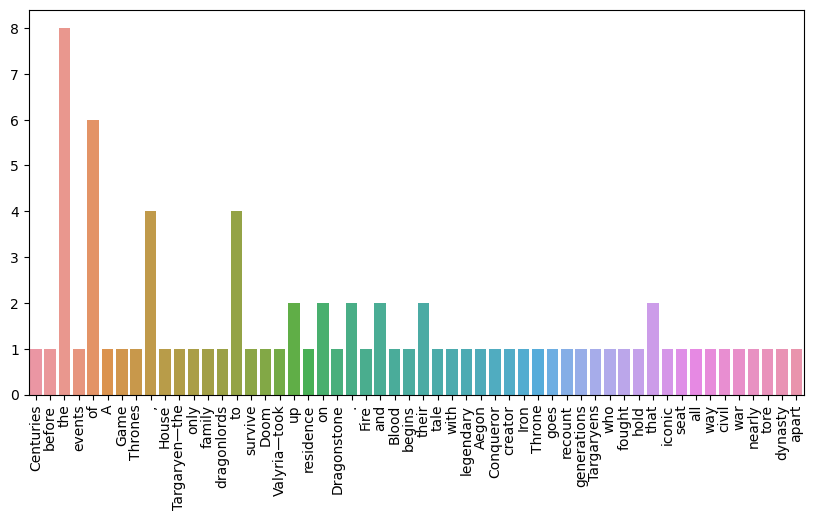

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot(has):
  plt.figure(figsize=(10,5))
  sns.barplot(x=list(has.keys()),y=list(has.values()))
  plt.xticks(rotation=90)
  plt.show()
plot(has)

In [8]:
word=[]
for i in words:
  if i not in set(stopwords.words("english")):
    word.append(i)
print(word)

['Centuries', 'events', 'A', 'Game', 'Thrones', ',', 'House', 'Targaryen—the', 'family', 'dragonlords', 'survive', 'Doom', 'Valyria—took', 'residence', 'Dragonstone', '.', 'Fire', 'Blood', 'begins', 'tale', 'legendary', 'Aegon', 'Conqueror', ',', 'creator', 'Iron', 'Throne', ',', 'goes', 'recount', 'generations', 'Targaryens', 'fought', 'hold', 'iconic', 'seat', ',', 'way', 'civil', 'war', 'nearly', 'tore', 'dynasty', 'apart', '.']


In [9]:
f=freq(word)
print(f)

{'Centuries': 2, 'before': 1, 'the': 8, 'events': 2, 'of': 6, 'A': 2, 'Game': 2, 'Thrones': 2, ',': 8, 'House': 2, 'Targaryen—the': 2, 'only': 1, 'family': 2, 'dragonlords': 2, 'to': 4, 'survive': 2, 'Doom': 2, 'Valyria—took': 2, 'up': 2, 'residence': 2, 'on': 2, 'Dragonstone': 2, '.': 4, 'Fire': 2, 'and': 2, 'Blood': 2, 'begins': 2, 'their': 2, 'tale': 2, 'with': 1, 'legendary': 2, 'Aegon': 2, 'Conqueror': 2, 'creator': 2, 'Iron': 2, 'Throne': 2, 'goes': 2, 'recount': 2, 'generations': 2, 'Targaryens': 2, 'who': 1, 'fought': 2, 'hold': 2, 'that': 2, 'iconic': 2, 'seat': 2, 'all': 1, 'way': 2, 'civil': 2, 'war': 2, 'nearly': 2, 'tore': 2, 'dynasty': 2, 'apart': 2}


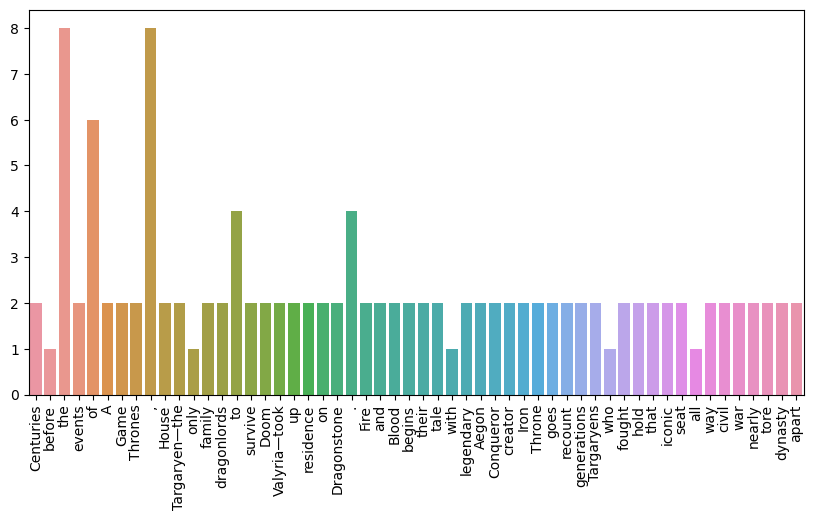

In [10]:
plot(f)

In [11]:
stemmer=PorterStemmer()
lemat=WordNetLemmatizer()

In [12]:
def lemmatize(words):
  lem=[]
  for i in words:
    lem.append(lemat.lemmatize(i))
  return lem
print(lemmatize(word))

['Centuries', 'event', 'A', 'Game', 'Thrones', ',', 'House', 'Targaryen—the', 'family', 'dragonlords', 'survive', 'Doom', 'Valyria—took', 'residence', 'Dragonstone', '.', 'Fire', 'Blood', 'begin', 'tale', 'legendary', 'Aegon', 'Conqueror', ',', 'creator', 'Iron', 'Throne', ',', 'go', 'recount', 'generation', 'Targaryens', 'fought', 'hold', 'iconic', 'seat', ',', 'way', 'civil', 'war', 'nearly', 'tore', 'dynasty', 'apart', '.']


In [15]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/aswatha/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [16]:
from nltk import word_tokenize, pos_tag, ne_chunk
def pos(words):
  pos_tags = nltk.pos_tag(words[:5])
  return pos_tags
print("POS Tags:", pos(word))

POS Tags: [('Centuries', 'NNS'), ('events', 'NNS'), ('A', 'DT'), ('Game', 'NNP'), ('Thrones', 'NNP')]


In [17]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 16.4 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [18]:
import spacy
from spacy import displacy
nlp=spacy.load("en_core_web_sm")
doc=nlp(corpus)
displacy.render(doc,style="ent",page=True)
for ent in doc.ents:
  print(ent.text,"-",ent.label_)

Centuries - DATE
Thrones - ORG
House - ORG
Valyria - GPE
Blood - PERSON
Aegon - GPE
Targaryens - PRODUCT


In [19]:
from nltk.collocations import BigramCollocationFinder,TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures,TrigramAssocMeasures
bigram_measures=BigramAssocMeasures()
trigram_measures=TrigramAssocMeasures()

In [21]:
def bigram(word):
  finder=BigramCollocationFinder.from_words(word)
  return finder.nbest(bigram_measures.likelihood_ratio,10)
print(bigram(word))

[('A', 'Game'), ('Aegon', 'Conqueror'), ('Blood', 'begins'), ('Centuries', 'events'), ('Doom', 'Valyria—took'), ('Fire', 'Blood'), ('Game', 'Thrones'), ('House', 'Targaryen—the'), ('Iron', 'Throne'), ('Targaryens', 'fought')]


In [22]:
def trigram(word):
  finder=TrigramCollocationFinder.from_words(word)
  return finder.nbest(trigram_measures.likelihood_ratio,10)
print(trigram(word))

[('A', 'Game', 'Thrones'), ('Blood', 'begins', 'tale'), ('Centuries', 'events', 'A'), ('Doom', 'Valyria—took', 'residence'), ('Fire', 'Blood', 'begins'), ('House', 'Targaryen—the', 'family'), ('Targaryens', 'fought', 'hold'), ('Targaryen—the', 'family', 'dragonlords'), ('Valyria—took', 'residence', 'Dragonstone'), ('begins', 'tale', 'legendary')]
